# Weather Trend Forecasting Project

This project uses the Global Weather Repository dataset from Kaggle to forecast future weather trends and perform detailed analyses.  
**Deliverables:**  
- Data cleaning and preprocessing  
- Exploratory Data Analysis (EDA)  
- Basic forecasting with an ARIMA model  
- Advanced analyses including anomaly detection, multiple forecasting models (ARIMA & Prophet), ensemble forecasting, and unique analyses such as climate analysis, feature importance, and spatial visualization.



## 1. Basic Assignment
### 1.1 Data Cleaning & Preprocessing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('GlobalWeatherRepository.csv')
print("Dataset Head:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill temperature & precipitation with the mean
df['temperature_celsius'] = df['temperature_celsius'].fillna(df['temperature_celsius'].mean())
df['precip_mm'] = df['precip_mm'].fillna(df['precip_mm'].mean())

# Convert 'lastupdated' column to datetime and sort the DataFrame
df['last_updated'] = pd.to_datetime(df['last_updated'])
df = df.sort_values('last_updated')
df.set_index('last_updated', inplace=True)

print("\nDataFrame Info After Preprocessing:")
print(df.info())


Dataset Head:
       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2 

### 1.2 Exploratory Data Analysis (EDA)


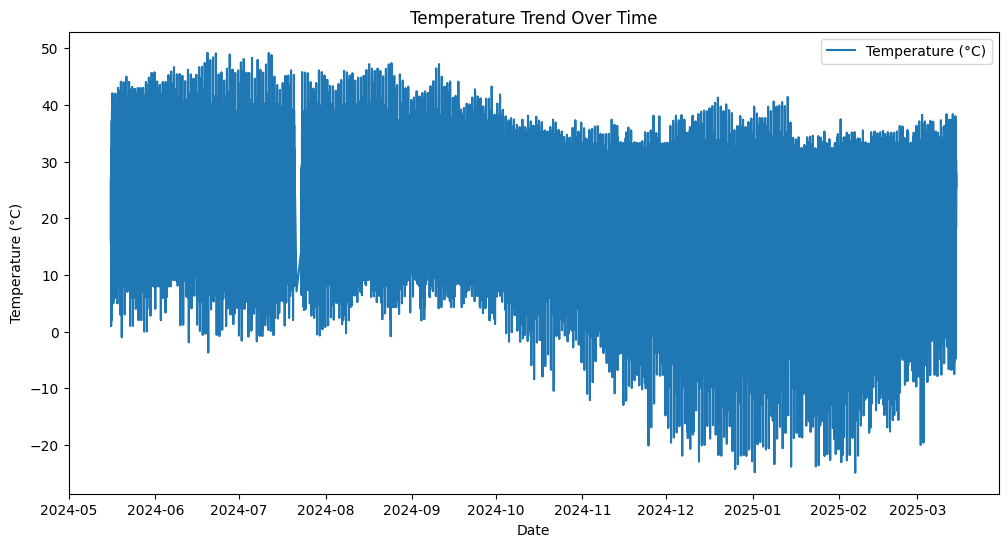

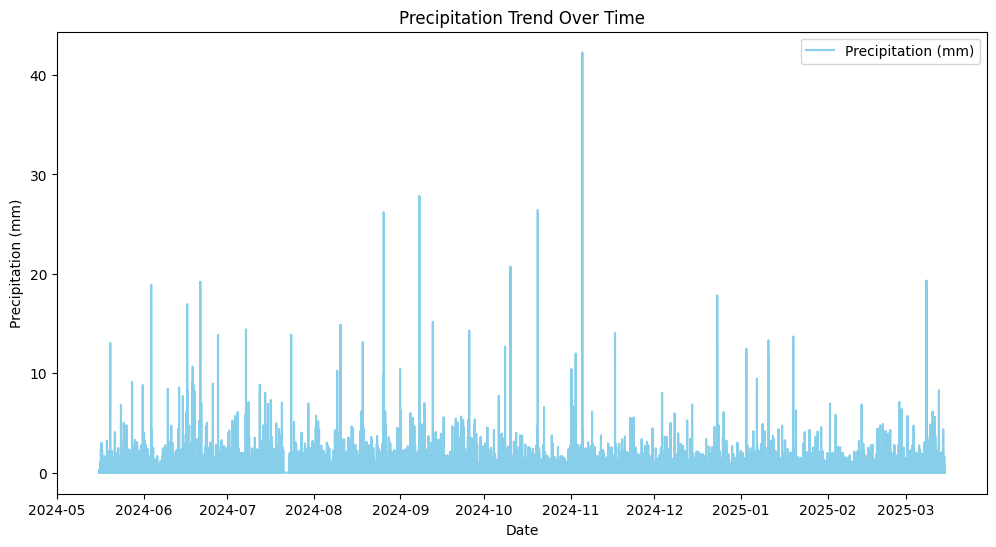

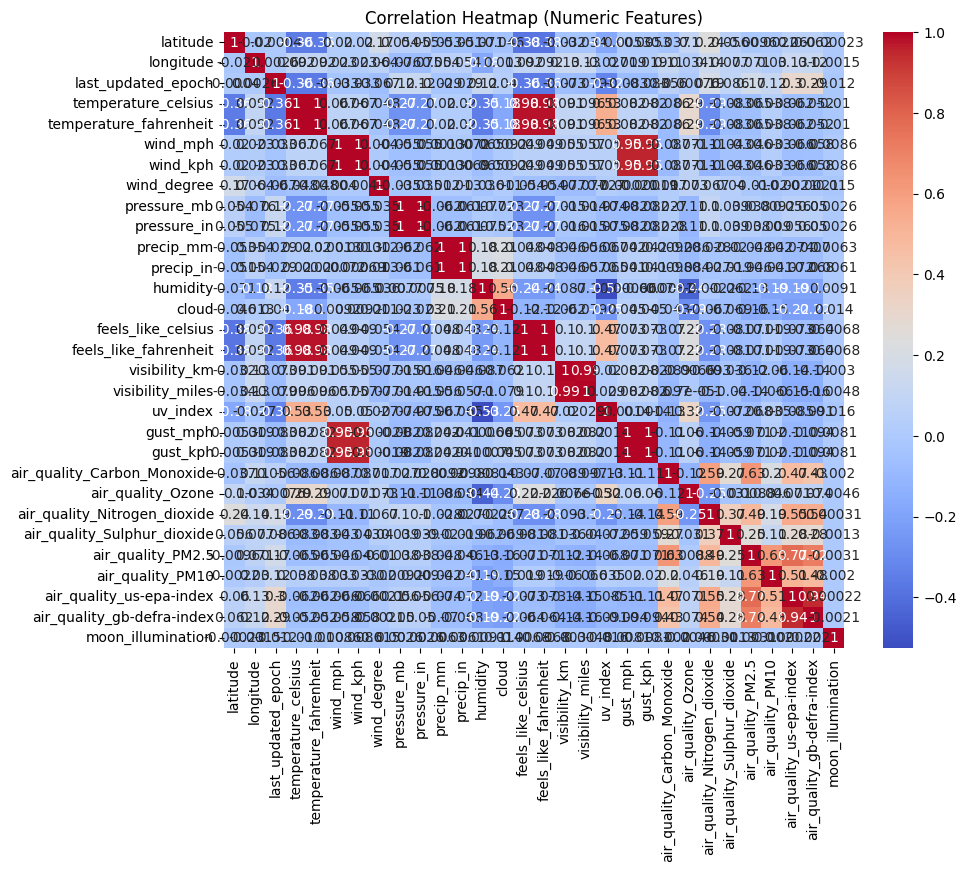

In [2]:
# Plot Temperature Trend over Time 
plt.figure(figsize=(12,6))
plt.plot(df.index, df['temperature_celsius'], label='Temperature (°C)')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Plot Precipitation Trend over Time 
plt.figure(figsize=(12,6))
plt.plot(df.index, df['precip_mm'], label='Precipitation (mm)', color='skyblue')
plt.title('Precipitation Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

# Correlation Heatmap 
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


### 1.3 Basic Forecasting Model: ARIMA



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     temperature_celsius   No. Observations:                46926
Model:                  ARIMA(1, 1, 1)   Log Likelihood             -164765.194
Date:                 Fri, 14 Mar 2025   AIC                         329536.388
Time:                         16:54:53   BIC                         329562.657
Sample:                              0   HQIC                        329544.641
                               - 46926                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0400      0.004      9.154      0.000       0.031       0.049
ma.L1         -0.9303      0.002   -549.228      0.000      -0.934      -0.927
sigma2        65.6635      0.375    175.165 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA Model Performance:
MAE: 9.533658749624985
RMSE: 10.957907894459911


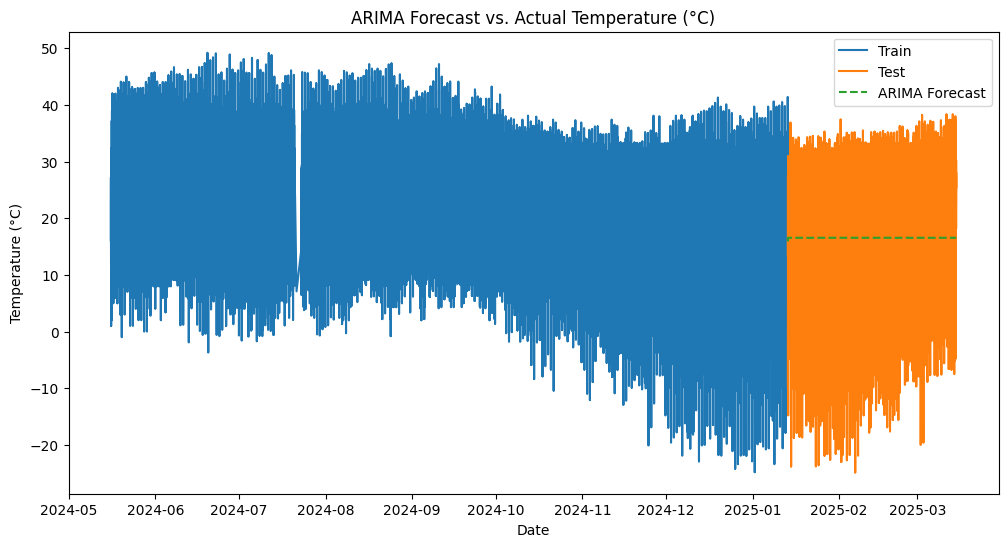

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define training and test sets (80% train, 20% test) using temperature_celsius
train_size = int(len(df) * 0.8)
train, test = df['temperature_celsius'][:train_size], df['temperature_celsius'][train_size:]

# Build and fit the ARIMA model 
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print("ARIMA Model Performance:")
print("MAE:", mae)
print("RMSE:", rmse)

# Plot the forecast against the actual data
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast vs. Actual Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


## 2. Advanced Assignment
### 2.1 Advanced EDA: Anomaly Detection with IsolationForest


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


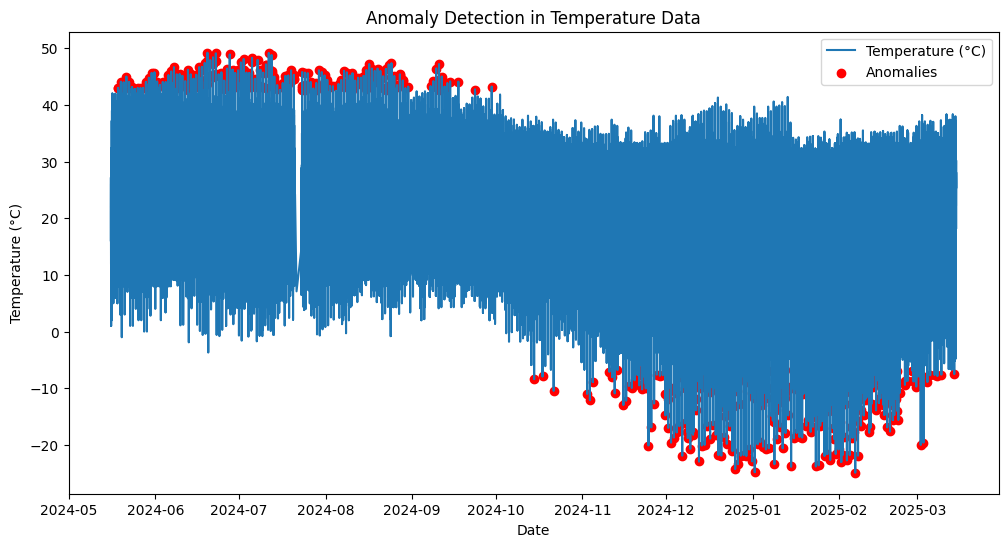

In [4]:
from sklearn.ensemble import IsolationForest

# Perform anomaly detection on the temperature data
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df[['temperature_celsius']])

# Identify anomalies
anomalies = df[df['anomaly'] == -1]

# Plot temperature data with anomalies highlighted
plt.figure(figsize=(12,6))
plt.plot(df.index, df['temperature_celsius'], label='Temperature (°C)')
plt.scatter(anomalies.index, anomalies['temperature_celsius'], color='red', label='Anomalies')
plt.title('Anomaly Detection in Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


### 2.2 Forecasting with Multiple Models: Prophet & Ensemble Forecasting


16:55:00 - cmdstanpy - INFO - Chain [1] start processing
16:55:10 - cmdstanpy - INFO - Chain [1] done processing


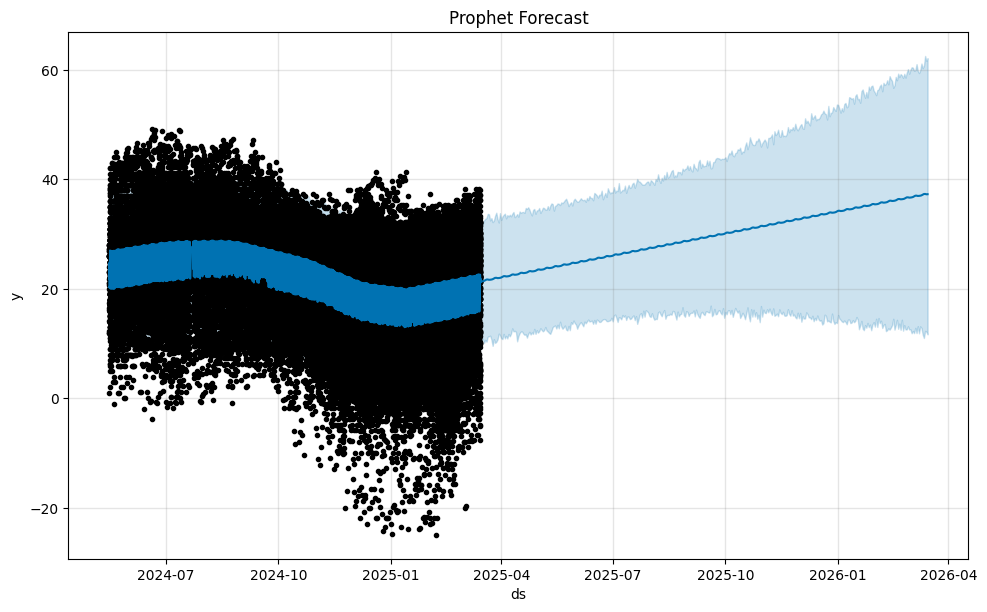

In [5]:
# Create the DataFrame for Prophet which requires columns: 'ds' (datetime) and 'y' (target variable)
prophet_df = df.reset_index()[['last_updated', 'temperature_celsius']].rename(
    columns={'last_updated': 'ds', 'temperature_celsius': 'y'}
)

# Import Prophet (ensure you have installed 'prophet')
from prophet import Prophet

# Initialize and fit the Prophet model using the full dataset
m = Prophet()
m.fit(prophet_df)

# Create a future DataFrame for forecasting 
future = m.make_future_dataframe(periods=365)
forecast_prophet = m.predict(future)

# Plot the Prophet forecast
fig1 = m.plot(forecast_prophet)
plt.title('Prophet Forecast')
plt.show()


In [7]:
# --- Prophet Evaluation Using Train-Test Split ---

# Define train and test splits (80% train, 20% test)
train_size = int(len(prophet_df) * 0.8)
train_prophet = prophet_df.iloc[:train_size]
test_prophet = prophet_df.iloc[train_size:].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert 'ds' to datetime properly using .loc
test_prophet.loc[:, 'ds'] = pd.to_datetime(test_prophet['ds'])

# Fit Prophet on the training data
m_train = Prophet()
m_train.fit(train_prophet)

# Forecast for the test period; make_future_dataframe extends from the train set end
future_train = m_train.make_future_dataframe(periods=len(test_prophet))
forecast_prophet_train = m_train.predict(future_train)
forecast_prophet_train['ds'] = pd.to_datetime(forecast_prophet_train['ds'])

# Merge forecast with test set on 'ds'
merged_forecast = test_prophet.merge(forecast_prophet_train[['ds', 'yhat']], on='ds', how='left')
print("Number of missing predictions:", merged_forecast['yhat'].isnull().sum())

# Fill missing predictions using forward fill and then backward fill
merged_forecast['yhat'] = merged_forecast['yhat'].ffill().bfill()

# Optionally, check if any NaNs remain
if merged_forecast['yhat'].isnull().sum() > 0:
    merged_forecast = merged_forecast.dropna(subset=['yhat'])

# Extract actual and predicted values
actual_y = merged_forecast['y']
predicted_y = merged_forecast['yhat']

# Calculate error metrics for Prophet forecast
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_prophet = mean_absolute_error(actual_y, predicted_y)
rmse_prophet = np.sqrt(mean_squared_error(actual_y, predicted_y))

print("Prophet Model Performance:")
print("MAE:", mae_prophet)
print("RMSE:", rmse_prophet)


16:55:50 - cmdstanpy - INFO - Chain [1] start processing
16:55:55 - cmdstanpy - INFO - Chain [1] done processing


Number of missing predictions: 11612
Prophet Model Performance:
MAE: 9.244980009085372
RMSE: 10.948235340445795


Ensemble Model Performance:
MAE: 9.370842321665393
RMSE: 10.913842277572698


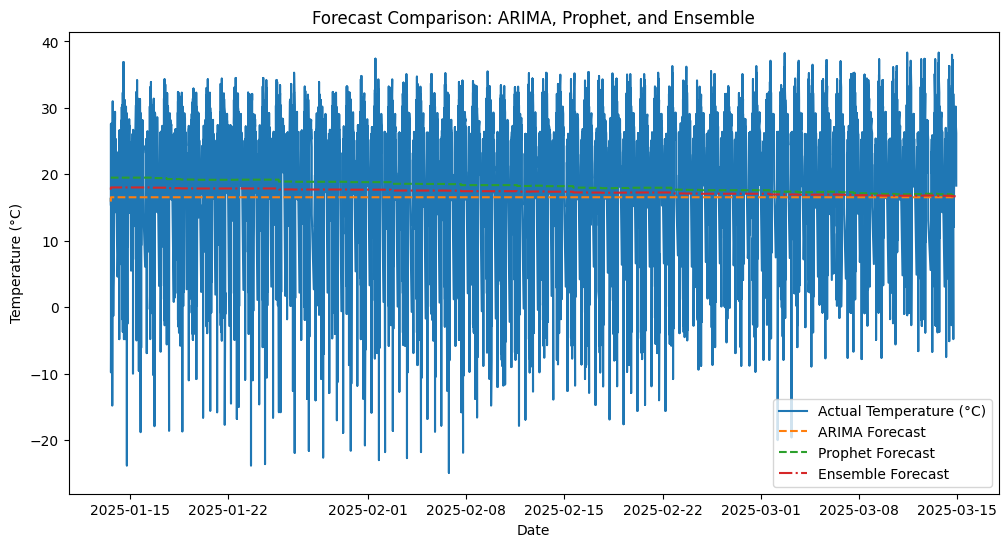

In [8]:
# ----- Ensemble Forecast: Combining ARIMA and Prophet Predictions -----
# For demonstration, we assume that:
#   - 'forecast' is a NumPy array or pandas Series with ARIMA predictions.
#   - 'test' is a pandas Series containing the actual temperature values for the test period.

# If your ARIMA forecast and test set are defined, compute the ensemble forecast as the average:
ensemble_forecast = (forecast.values + predicted_y.values) / 2

# Calculate error metrics for the ensemble model
mae_ensemble = mean_absolute_error(test, ensemble_forecast)
rmse_ensemble = np.sqrt(mean_squared_error(test, ensemble_forecast))
print("Ensemble Model Performance:")
print("MAE:", mae_ensemble)
print("RMSE:", rmse_ensemble)

# Plot the forecast comparison: ARIMA, Prophet, and Ensemble
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual Temperature (°C)')
plt.plot(test.index, forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(merged_forecast['ds'], predicted_y, label='Prophet Forecast', linestyle='--')
plt.plot(test.index, ensemble_forecast, label='Ensemble Forecast', linestyle='-.')
plt.title('Forecast Comparison: ARIMA, Prophet, and Ensemble')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


### 2.3 Unique Analyses
#### 2.3.1 Climate Analysis: Average Temperature by Country


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


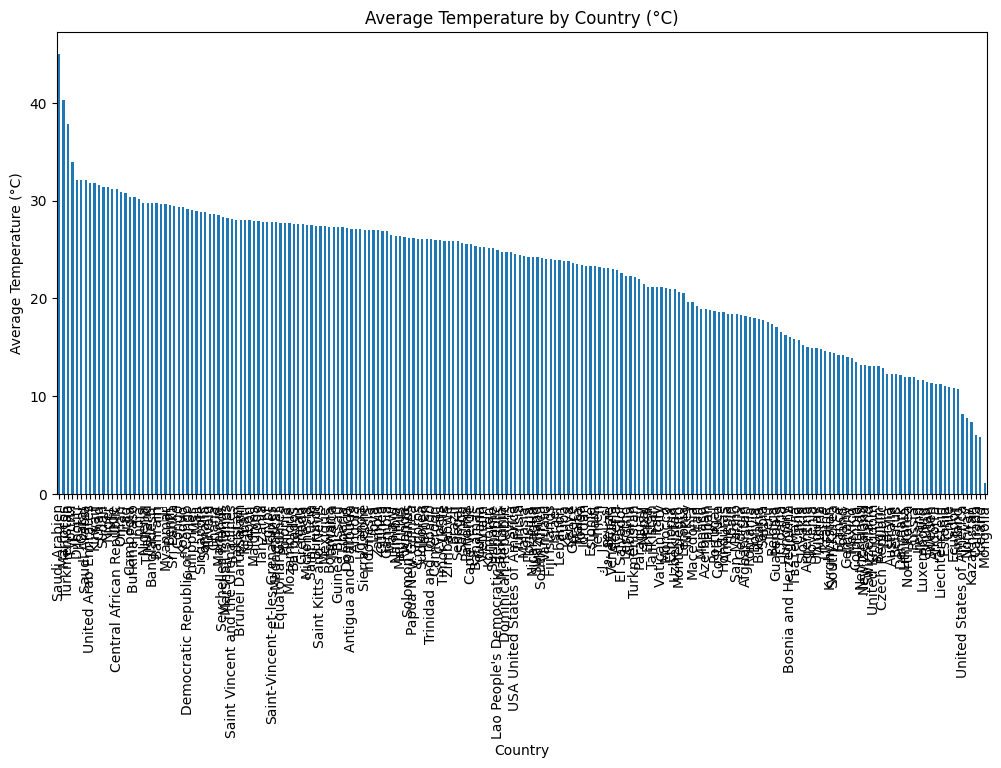

In [9]:
# Group the data by country and calculate the average temperature
if 'country' in df.columns:
    country_temp = df.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    country_temp.plot(kind='bar')
    plt.title('Average Temperature by Country (°C)')
    plt.xlabel('Country')
    plt.ylabel('Average Temperature (°C)')
    plt.show()


#### 2.3.2 Feature Importance: Using Random Forest


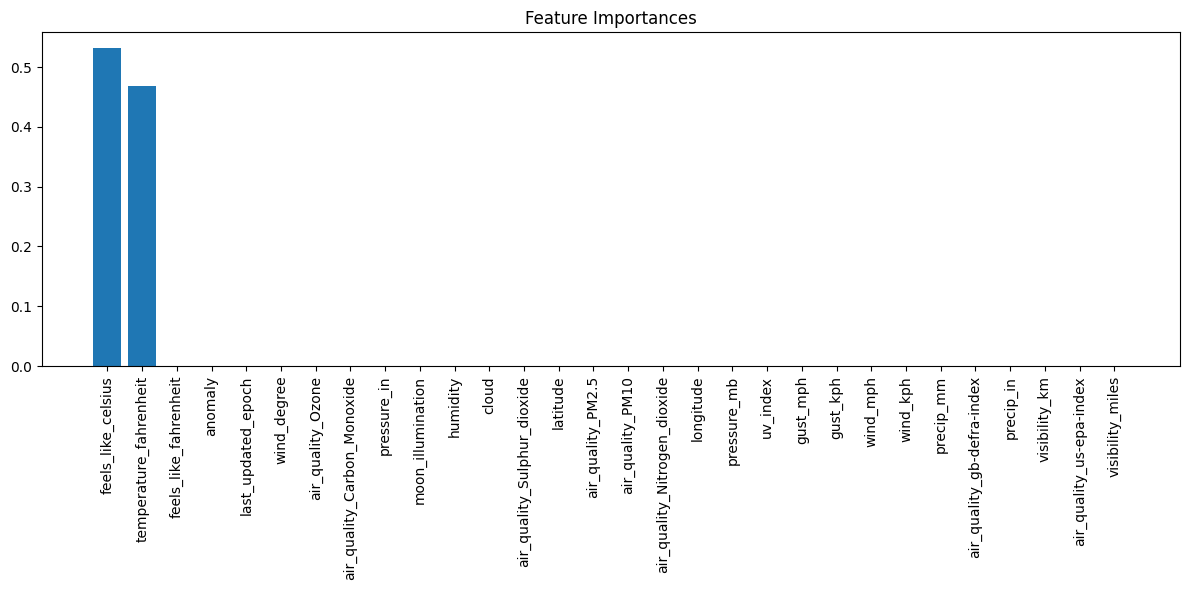

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Prepare numeric features and target for feature importance analysis
numeric_features = df.select_dtypes(include=[np.number])
if 'temperature_celsius' in numeric_features.columns:
    features = numeric_features.drop(['temperature_celsius'], axis=1)
else:
    features = numeric_features.copy()

target = df['temperature_celsius']

# Fit a Random Forest Regressor to compute feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features, target)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), features.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


#### 2.3.3 Spatial Analysis: Geographical Temperature Distribution


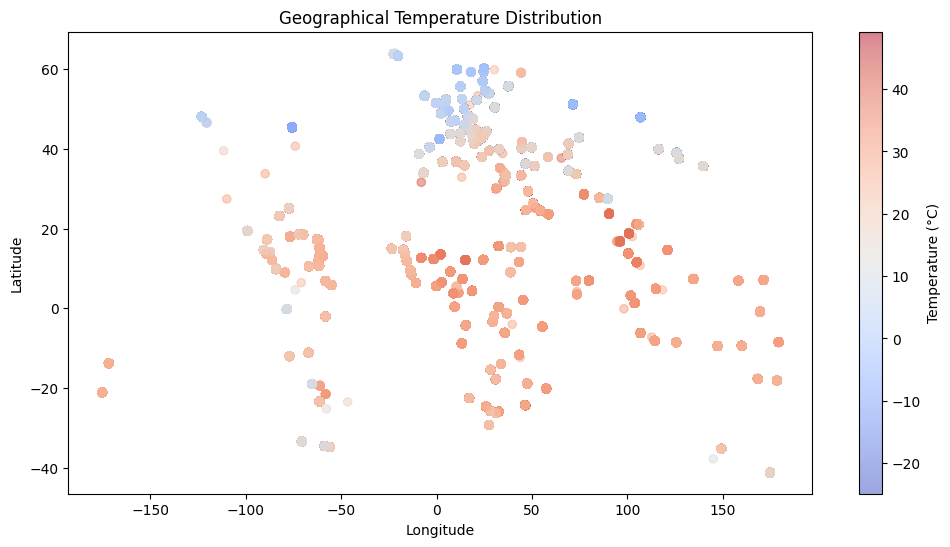

In [11]:
# Plot the geographical distribution of temperature using latitude and longitude
if 'latitude' in df.columns and 'longitude' in df.columns:
    plt.figure(figsize=(12,6))
    sc = plt.scatter(df['longitude'], df['latitude'], c=df['temperature_celsius'], cmap='coolwarm', alpha=0.5)
    plt.colorbar(sc, label='Temperature (°C)')
    plt.title('Geographical Temperature Distribution')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


## 3. Conclusion

In this advanced assignment, we:
- Performed anomaly detection on the temperature data using IsolationForest.
- Built and evaluated multiple forecasting models using Prophet (with a train-test split) and compared them with an ARIMA model. An ensemble forecast was created by averaging the two predictions.
- Explored unique analyses including climate analysis (average temperature by country), feature importance using a Random Forest model, and spatial analysis of temperature distribution.

These techniques provide deeper insights into weather trends and help improve forecast accuracy.


# PM Accelerator Mission
Product Manager Accelerator is dedicated to empowering product managers.